In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pyreadr

from os.path import join
from scipy.stats import spearmanr

In [2]:

PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_SAaxis/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [30]:
thk_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'smri_thick_age-SA.csv'),
    index_col=0, header=0
)
var_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'rsfmri_var_age-SA.csv'),
    index_col=0, header=0
)
rni_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'dmri_rsirnigm_age-SA.csv'),
    index_col=0, header=0
)
rnd_df = pd.read_csv(
    join(PROJ_DIR, OUTP_DIR, 'dmri_rsirndgm_age-SA.csv'),
    index_col=0, header=0
)

In [31]:
# no need to do this for each of the SA/age dfs
# just showing you the structure of the data
thk_df.head()

,SA_avg,age_avg,SA_rank
smri_thick_cdk_pericclh,1886.682350,-0.025384,1
smri_thick_cdk_cuneuslh,2815.554500,-0.016142,2
smri_thick_cdk_cuneusrh,2960.284955,-0.017391,3
smri_thick_cdk_periccrh,3064.538684,-0.029561,4
smri_thick_cdk_lingualrh,4769.030594,-0.022211,5


In [32]:
# read in each .Rda file and run correlations
result = pyreadr.read_r(join(PROJ_DIR, OUTP_DIR, 'residualized_rndscanner_sex.Rda'))
residualized_thick = result['Group1_residuals']

In [33]:
residualized_thick

,dmri_rsirndgm_cdk_bstslh.change_score,dmri_rsirndgm_cdk_caclh.change_score,dmri_rsirndgm_cdk_cmflh.change_score,dmri_rsirndgm_cdk_cnlh.change_score,dmri_rsirndgm_cdk_erlh.change_score,dmri_rsirndgm_cdk_fflh.change_score,dmri_rsirndgm_cdk_iplh.change_score,dmri_rsirndgm_cdk_itlh.change_score,dmri_rsirndgm_cdk_iclh.change_score,dmri_rsirndgm_cdk_lolh.change_score,...,dmri_rsirndgm_cdk_racrh.change_score,dmri_rsirndgm_cdk_rmfrh.change_score,dmri_rsirndgm_cdk_sfrh.change_score,dmri_rsirndgm_cdk_sprh.change_score,dmri_rsirndgm_cdk_strh.change_score,dmri_rsirndgm_cdk_smrh.change_score,dmri_rsirndgm_cdk_fprh.change_score,dmri_rsirndgm_cdk_tprh.change_score,dmri_rsirndgm_cdk_ttrh.change_score,dmri_rsirndgm_cdk_isrh.change_score
rownames,,,,,,,,,,,,,,,,,,,,,
NDAR_INV07HGA3B7,3.191830,-2.592571,-1.524317,0.025299,-1.697536,1.982702,0.498798,1.848413,0.156135,1.362944,...,2.254899,-1.541187,-1.054071,0.497698,0.926199,-0.336870,-1.412659,2.482432,-0.164423,0.133971
NDAR_INV07RAHHYH,-15.438883,-22.791213,-5.594909,-3.051753,-4.153162,-3.831248,-6.738586,-7.082904,-5.678204,-3.622527,...,-4.136785,-8.391882,-2.205248,-1.360625,-4.675447,0.814259,-2.890118,-0.649178,-14.990609,-4.419706
NDAR_INV09AUXBBT,3.899557,5.329646,-8.794810,3.104103,-9.216543,-0.174045,4.450860,0.265030,-0.823632,6.966438,...,-11.696937,-7.360367,-7.735355,-2.758540,1.731064,-3.469049,-10.344226,-0.988334,3.135567,-3.451170
NDAR_INV09ZE6UUK,-2.527594,2.690869,1.450588,7.041272,8.077888,6.507827,3.619910,5.795734,-0.089156,2.855514,...,7.574125,-2.280464,-2.313568,-0.088141,-3.189837,-3.346744,-4.653897,8.157993,0.998589,-2.633586
NDAR_INV0B7UGM1D,6.343100,-0.889656,1.526004,-3.832288,6.861588,1.788441,5.143073,-0.595155,1.874354,3.716588,...,5.692067,1.823060,2.778249,3.171785,-4.661322,-1.302427,-2.570219,-3.060634,-5.037608,-4.379176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NDAR_INVXWW4FAU3,-1.984298,-0.928269,-0.185381,-0.911316,-2.580633,1.010872,-3.988652,-1.598206,4.243063,-1.673762,...,-4.117825,-2.843806,-0.622072,0.033432,0.185152,1.589037,-1.023148,4.168224,1.010944,-0.643885
NDAR_INVZKJXBJMM,2.328729,17.798312,3.288425,3.963450,-5.540246,-1.218852,0.656272,-2.459801,2.407019,-1.154172,...,0.016629,4.995878,3.932559,3.500565,9.108814,1.481461,-1.153132,2.394955,10.071739,8.296493
NDAR_INVZKT1BV8Y,2.425650,-1.066960,2.547369,0.314398,-1.740326,0.981783,1.963306,0.914054,1.212791,0.778834,...,3.961704,1.942693,2.674520,2.028541,0.043730,2.157157,-4.171720,2.185469,-3.151555,2.742447


In [34]:
# this cell does the correlations

# first, make empty dataframes that we'll fill in the for loop
# for s-a axis loading corrs/alignment
sa_thick_corrs = pd.DataFrame()
# and for age-10 map corrs/alignment
age_thick_corrs = pd.DataFrame()

# now for each person (i),
for i in residualized_thick.index:
    # we'll grab all their residual thick change scores
    temp1 = residualized_thick.loc[i]
    # and rename the mini-dataframe, so that we know these are per-participant values
    temp1.name = 'ppt'
    # fix the index so that it matches the SA-axis rank 
    temp1.index = [var.split('.')[0] for var in temp1.index]
    # just grab the S-A axis rank column from thick_df
    temp2 = rnd_df['SA_rank']
    # rename it so that we know these are per-region s-a axis values
    temp2.name = 'sa_axis'
    # put those two mini-dfs together to make life easier
    # this aligns them based on the index, which they share
    temp = pd.concat([temp1, temp2], axis=1).dropna()
    # correlate! using the new names we gave the two columns
    r,p = spearmanr(temp['ppt'], temp['sa_axis'])
    # save the r values to the 'r' column and the p-values to the 'p' column
    sa_thick_corrs.at[i,'p'] = p
    sa_thick_corrs.at[i,'r'] = r
    
    # and now do it all over for the age map
    temp2 = rnd_df['age_avg']
    temp2.name = 'age_effect'
    temp = pd.concat([temp1, temp2], axis=1).dropna()
    r,p = spearmanr(temp['ppt'], temp['age_effect'])
    
    age_thick_corrs.at[i,'p'] = p
    age_thick_corrs.at[i,'r'] = r
    
#sa_thick_corrs.to_csv(join(PROJ_DIR, OUTP_DIR, 'sa_thick_corrs.csv'))
#age_thick_corrs.to_csv(join(PROJ_DIR, OUTP_DIR, 'age_thick_corrs.csv'))

In [37]:
age_thick_corrs

,p,r
NDAR_INV07HGA3B7,1.221087e-03,-0.384128
NDAR_INV07RAHHYH,1.400385e-01,-0.180822
NDAR_INV09AUXBBT,2.928599e-17,-0.814559
NDAR_INV09ZE6UUK,7.210914e-01,-0.044089
NDAR_INV0B7UGM1D,9.058056e-01,-0.014620
...,...,...
NDAR_INVXWW4FAU3,2.571419e-01,-0.139329
NDAR_INVZKJXBJMM,4.329950e-01,0.096652
NDAR_INVZKT1BV8Y,5.444716e-01,0.074780
NDAR_INVVKPJ803Y,1.624501e-01,-0.171317


<AxesSubplot:xlabel='r', ylabel='Density'>

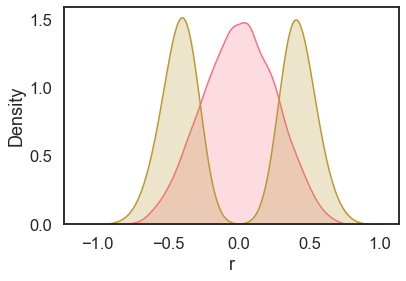

In [38]:
# set the plotting settings so our graphs are pretty
sns.set(context='talk', style='white', palette='husl')

# we're going to plot all the correlations
# and in a different color, the significant correlations @ p < 0.01
fig,ax = plt.subplots()
sns.kdeplot(sa_thick_corrs['r'], fill=True, ax=ax)
sns.kdeplot(sa_thick_corrs[sa_thick_corrs['p'] < 0.01]['r'], fill=True, ax=ax)
#fig.savefig(join(PROJ_DIR, FIGS_DIR, 'rnd_x_sa-axis.png'), bbox_inches='tight')

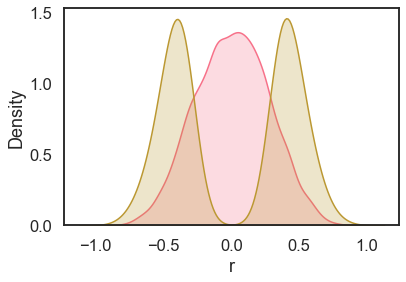

In [39]:
# same for age effect
fig,ax = plt.subplots()
sns.kdeplot(age_thick_corrs['r'], fill=True, ax=ax)
sns.kdeplot(age_thick_corrs[age_thick_corrs['p'] < 0.01]['r'], fill=True, ax=ax)
fig.savefig(join(PROJ_DIR, FIGS_DIR, 'rnd_x_age.png'), bbox_inches='tight')

In [45]:
age_thick_corrs[age_thick_corrs['p'] < 0.01].sort_values('r')

,p,r
NDAR_INVA4EVCYRA,1.366126e-12,-0.731687
NDAR_INVLC0TC7LX,4.307826e-12,-0.720502
NDAR_INVB2ZN28L8,7.098679e-12,-0.715464
NDAR_INVA1A2WJG5,1.594276e-11,-0.707066
NDAR_INVPV7EDNMA,2.891994e-11,-0.700691
...,...,...
NDAR_INVNXP646J1,2.116506e-09,0.649235
NDAR_INVL2FYHWYV,1.018459e-10,0.686644
NDAR_INV0G2N59GL,5.943294e-11,0.692751
NDAR_INVM4MC3HPC,2.638619e-11,0.701683


In [46]:
np.sum(age_thick_corrs['p'] < 0.01)

1014

In [48]:
sa_thick_corrs[sa_thick_corrs['p'] < 0.01].describe()

,p,r
count,1.322000e+03,1322.000000
mean,1.640891e-03,0.006296
std,2.419144e-03,0.459378
min,4.405477e-20,-0.850479
25%,1.029886e-05,-0.422453
50%,3.324421e-04,0.317918
75%,2.370051e-03,0.421174
max,9.986659e-03,0.787342


In [49]:
df = pd.read_pickle(join(PROJ_DIR, DATA_DIR, 'data_qcd.pkl'))

In [50]:
df.columns

Index(['nihtbx_reading_uncorrected.baseline_year_1_arm_1',
       'nihtbx_picvocab_uncorrected.2_year_follow_up_y_arm_1',
       'nihtbx_pattern_uncorrected.change_score',
       'nihtbx_pattern_uncorrected.2_year_follow_up_y_arm_1',
       'pds_p_ss_female_category_2.baseline_year_1_arm_1',
       'rel_group_id.baseline_year_1_arm_1',
       'rel_family_id.2_year_follow_up_y_arm_1',
       'nihtbx_cardsort_uncorrected.change_score',
       'rel_family_id.baseline_year_1_arm_1',
       'mrif_score.baseline_year_1_arm_1',
       ...
       'dmri_rsirndgm_cdk_fprh.change_score',
       'dmri_rsirndgm_cdk_tprh.baseline_year_1_arm_1',
       'dmri_rsirndgm_cdk_tprh.2_year_follow_up_y_arm_1',
       'dmri_rsirndgm_cdk_tprh.change_score',
       'dmri_rsirndgm_cdk_ttrh.baseline_year_1_arm_1',
       'dmri_rsirndgm_cdk_ttrh.2_year_follow_up_y_arm_1',
       'dmri_rsirndgm_cdk_ttrh.change_score',
       'dmri_rsirndgm_cdk_isrh.baseline_year_1_arm_1',
       'dmri_rsirndgm_cdk_isrh.2_year_follo

In [54]:
pd.concat([sa_thick_corrs['r'], df['nihtbx_reading_uncorrected.baseline_year_1_arm_1']], axis=1).corr()

,r,nihtbx_reading_uncorrected.baseline_year_1_arm_1
r,1.000000,0.034643
nihtbx_reading_uncorrected.baseline_year_1_arm_1,0.034643,1.000000


In [60]:
cbcl_df = pd.read_pickle('/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_vbgmm/data/data_qcd.pkl')

In [64]:
i = 0
for col in cbcl_df.columns:
    if not 'mri' in col:
        i += 1
        dat = pd.concat([sa_thick_corrs['r'], cbcl_df[col]], axis=1).dropna()
        corr = spearmanr(dat)
        if corr.pvalue < 0.01:
            print(col,'\n', spearmanr(dat))

cbcl_scr_syn_internal_r.2_year_follow_up_y_arm_1 
 SpearmanrResult(correlation=0.04937673691594576, pvalue=0.0034883097520175045)
nihtbx_reading_uncorrected.baseline_year_1_arm_1 
 SpearmanrResult(correlation=0.04162282839766429, pvalue=0.008131230748989608)
nihtbx_list_uncorrected.baseline_year_1_arm_1 
 SpearmanrResult(correlation=0.0486510985242233, pvalue=0.001990444951077162)
nihtbx_reading_uncorrected.2_year_follow_up_y_arm_1 
 SpearmanrResult(correlation=0.04375963670940324, pvalue=0.006352463468754585)
nihtbx_picture_uncorrected.baseline_year_1_arm_1 
 SpearmanrResult(correlation=0.042414878475963924, pvalue=0.00697616395708139)


/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/scipy/stats/_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be p